<a href="https://colab.research.google.com/github/kumarsh8483/Projects/blob/main/Faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import adam_v2
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

In [53]:
location = r'/ORL_faces.npz'

In [4]:
import os
path =  os.path.expanduser(rb'~\Downloads\2017.csv')

In [110]:
data = np.load(location)
# load the "Train Images"
x_train = data['trainX']
#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))
#data =pd.read_csv(r'/Users/dkumar/Downloads/2017.csv')

x_train : [[0.1882353  0.19215687 0.1764706  0.18431373 ... 0.17254902 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 0.20784314 ... 0.14509805 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 0.14509805 ... 0.12156863 0.11372549 0.10196079 0.11372549]
 [0.24705882 0.20784314 0.13725491 0.14117648 ... 0.5372549  0.16078432 0.03921569 0.09411765]
 ...
 [0.44705883 0.43137255 0.44705883 0.43529412 ... 0.38431373 0.40784314 0.3529412  0.39607844]
 [0.44705883 0.45882353 0.44705883 0.45882353 ... 0.3882353  0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 0.41568628 ... 0.11372549 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 0.45882353 ... 0.39607844 0.37254903 0.39215687 0.39607844]]
Y-train shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3
  3  3  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5 

In [111]:
#split dataset

x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234)

In [113]:
#change the sie of images to feed to CNN

im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 228
x_test shape: (160,)


In [96]:
#Build a CNN model that has 3 main layers
#Convolotional Layer
#Pooling Layer
#Fully Connected Layer

#filters= the depth of output image or kernels

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=adam_v2.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)


In [97]:
cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 43, 36)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 24, 19, 54)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 24624)             0         
                                                                 
 dense_24 (Dense)            (None, 2024)             

In [98]:
#train the model
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=150, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/150
1/1 - 11s - loss: 3.0151 - accuracy: 0.0570 - val_loss: 2.9752 - val_accuracy: 0.0833 - 11s/epoch - 11s/step
Epoch 2/150
1/1 - 8s - loss: 3.0078 - accuracy: 0.0482 - val_loss: 2.9824 - val_accuracy: 0.0833 - 8s/epoch - 8s/step
Epoch 3/150
1/1 - 8s - loss: 2.9887 - accuracy: 0.0746 - val_loss: 2.9830 - val_accuracy: 0.0000e+00 - 8s/epoch - 8s/step
Epoch 4/150
1/1 - 7s - loss: 3.0035 - accuracy: 0.0789 - val_loss: 2.9870 - val_accuracy: 0.0000e+00 - 7s/epoch - 7s/step
Epoch 5/150
1/1 - 8s - loss: 2.9711 - accuracy: 0.0789 - val_loss: 2.9953 - val_accuracy: 0.0000e+00 - 8s/epoch - 8s/step
Epoch 6/150
1/1 - 7s - loss: 3.0406 - accuracy: 0.0570 - val_loss: 3.0008 - val_accuracy: 0.0000e+00 - 7s/epoch - 7s/step
Epoch 7/150
1/1 - 7s - loss: 3.0078 - accuracy: 0.0614 - val_loss: 3.0033 - val_accuracy: 0.0833 - 7s/epoch - 7s/step
Epoch 8/150
1/1 - 7s - loss: 3.0011 - accuracy: 0.0526 - val_loss: 3.0021 - val_accuracy: 0.0000e+00 - 7s/epoch - 7s/step
Epoch 9/150
1/1 - 8s - loss: 2.98

In [99]:
#Evaluate Test data
score = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(score[0]))
print('test acc {:.4f}'.format(score[1]))

test los 0.2777
test acc 0.9438


In [100]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


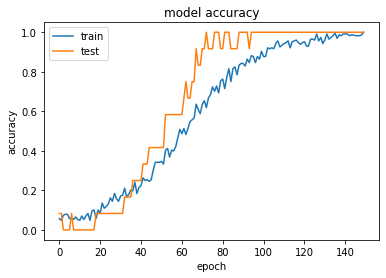

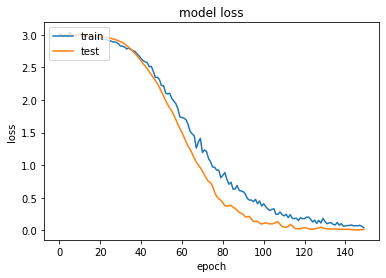

In [101]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

accuracy : 
0.94375
Confusion matrix, without normalization
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
Confusion matrix, without normalization


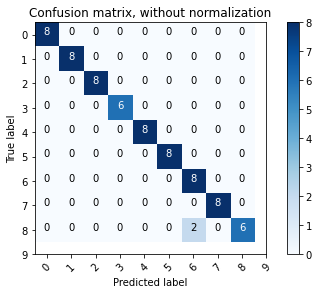

Confusion matrix, without normalization


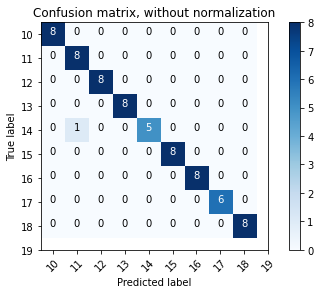

Confusion matrix:
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1

In [108]:
predicted =np.array( cnn_model.predict(x_test))
#print(predicted)
#print(y_test)
ynew = cnn_model.predict(x_test)

#predict_x=model.predict(X_test) 
classes_x=np.argmax(ynew,axis=1)
Acc=accuracy_score(y_test,classes_x)
print("accuracy : ")
print(Acc)
#/tn, fp, fn, tp = confusion_matrix(np.array(y_test), ynew).ravel()
cnf_matrix=confusion_matrix(np.array(y_test), classes_x)

y_test1 = np_utils.to_categorical(y_test, 20)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


print('Confusion matrix, without normalization')
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix[1:10,1:10], classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19],
                      title='Confusion matrix, without normalization')

print("Confusion matrix:\n%s" % confusion_matrix(np.array(y_test), classes_x))
print(classification_report(np.array(y_test), classes_x))